### From Fermi TLE, print and plot Fermi orbit data

### <span style="color:red; font-family:Georgia;">Robert Cameron, June 2017</span>

Based on the python implementation of SGP4 orbit propagator
available at https://pypi.python.org/pypi/sgp4/

In [1]:
# specify the date range limits
start = "2017-01-01" 
stop = "2017-01-02"

In [2]:
# specify output directory for output text files and plots
outdir = "/Users/rac/Documents/GLAST/ISOC/LATmetrics/orbit/"

In [3]:
import numpy as np
import re
import urllib
from math import *
#%matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt, mpld3
#plt.rc('figure', figsize = [8, 6])
#plt.rc('font', size = 12)
import sys
from os.path import expanduser
HOME = expanduser("~")
sys.path.append(HOME+'/Documents/GLAST/sgp4-1.4')
from sgp4.earth_gravity import wgs84
from sgp4.io import twoline2rv
from sgp4.ext import jday, invjday, days2mdhms
import datetime as dt     
today = str(dt.date.today())

In [4]:
tle = !tail -2 /Users/rac/Documents/GLAST/FGST-TLE.txt
tle

['1 33053U 08029A   17179.69959789  .00000482  00000-0  10950-4 0  9993',
 '2 33053  25.5827 285.3837 0012754  56.1335 304.0413 15.10906979499063']

In [5]:
webTLE = "http://celestrak.com/NORAD/elements/science.txt"
lines = urllib.request.urlopen(webTLE).readlines()
regex = re.compile(b'(1|2) 33053')
tle = [x.decode().replace('\r\n', '') for x in lines if regex.match(x)]
tle

['1 33053U 08029A   17179.69959789  .00000482  00000-0  10950-4 0  9993',
 '2 33053  25.5827 285.3837 0012754  56.1335 304.0413 15.10906979499063']

In [6]:
foo = 5
print(webTLE, foo)

http://celestrak.com/NORAD/elements/science.txt 5


In [7]:
line1 = tle[0]
m = re.search('^1 (\d{5})([A-Za-z]{1}) (\d{2})(\d{3})([A-Za-z ]{3}) (\d{2})(\d{3})\.(\d{8}) (.)\.(\d{8}) (.)(\d{5})-(\d{1}) (.)(\d{5})-(\d{1}) (\d{1}) (.{4})(\d{1})$', line1)

mm1 = m.group(9) + "0." + m.group(10)
mm2 = m.group(11) + "0." + m.group(12) + "x10^-" + m.group(13)
bstar = m.group(14) + "0." + m.group(15) + "x10^-" + m.group(16)
print ("Satellite Number: ", m.group(1))
print ("Classification: ", m.group(2))
print ("Launch year: 20", m.group(3),sep='')
print ("Launch number: ", m.group(4))
print ("Piece of the launch: ", m.group(5))
print ("TLE Epoch year: 20", m.group(6),sep='')
print ("TLE Epoch day of year: ", m.group(7),'.', m.group(8),sep='')
print ("First time derivative of the Mean Motion: ",mm1)
print ("Second time derivative of the Mean Motion: ",mm2)
print ("BSTAR drag term: ",bstar)
print ("Ephemeris type: ", m.group(17))
print ("Element Number: ", m.group(18))
print ("TLE Line 1 checksum (modulo 10): ", m.group(19))

Satellite Number:  33053
Classification:  U
Launch year: 2008
Launch number:  029
Piece of the launch:  A  
TLE Epoch year: 2017
TLE Epoch day of year: 179.69959789
First time derivative of the Mean Motion:   0.00000482
Second time derivative of the Mean Motion:   0.00000x10^-0
BSTAR drag term:   0.10950x10^-4
Ephemeris type:  0
Element Number:   999
TLE Line 1 checksum (modulo 10):  3


In [8]:
line2 = tle[1]
m = re.search('^2 (\d{5}) (.{8}) (.{8}) (.{7}) (.{8}) (.{8}) (.{11})(.{5})(\d{1})$', line2)

ecc = "0." + m.group(4)
incl = m.group(2)
print("Satellite Number: ", m.group(1))
print("Inclination (degrees): ", incl)
print("RA of the Ascending Node (degrees): ", m.group(3))
print("Eccentricity: ", ecc)
print("Argument of Perigee (degrees): ", m.group(5))
print("Mean Anomaly (degrees): ", m.group(6))
print("Mean Motion (orbits per day): ", m.group(7))
print("Revolution number at epoch: ", m.group(8))
print("TLE Line 2 checksum (modulo 10): ", m.group(9))

Satellite Number:  33053
Inclination (degrees):   25.5827
RA of the Ascending Node (degrees):  285.3837
Eccentricity:  0.0012754
Argument of Perigee (degrees):   56.1335
Mean Anomaly (degrees):  304.0413
Mean Motion (orbits per day):  15.10906979
Revolution number at epoch:  49906
TLE Line 2 checksum (modulo 10):  3


In [9]:
Req = 6378.0;
print ("Derived values:\n")
period_s = 86400/float(m.group(7))
period_m = period_s/60.0;
print("\tOrbital period = {:.2f} seconds = {:.3f} minutes".format(period_s,period_m))
pi = 3.14159265359;
GM = 398600.44;  # km^3 s^-2 (Wertz 1978)
semimajor = (GM*(period_s/2/pi)**2.0)**0.3333333333;
# b^2 = a^2*(1-e^2)
# semiminor = sqrt(semimajor*semimajor*(1 - ecc*ecc));
print("\tOrbit Semi-major axis length (km) = {:.3f}".format(semimajor))
alt = semimajor - Req;
print("\tOrbit mean altitude (km) = {:.3f} (Earth Equatorial Radius = {} km)".format(alt,Req))
limbangle = 90 + degrees(acos(Req/semimajor))
print("\tMean Earth Limb Angle from Zenith (deg) = {:.3f}".format(limbangle))
ecc = float(ecc)
incl = float(incl)
perigee = semimajor*(1-ecc) - Req
apogee  = semimajor*(1+ecc) - Req
print("\tOrbit  apogee altitude (km) = {:.3f}".format(apogee))
print("\tOrbit perigee altitude (km) = {:.3f}".format(perigee))
# precession rate (deg/day) = -2.06474x10^14 x a^-3.5 x (1-e^2)^-2 x cos i
ecc_term = (1.0-ecc**2.0)**2.0
print("\tEccentricity factor in precession rate = ",ecc_term)
prec_rate = -2.06474e14 * cos(radians(incl)) /ecc_term / (semimajor**3.5)
print("\tOrbit precession rate (deg/day) = {:.3f}".format(prec_rate))
prec_period = abs(360/prec_rate)
print("\tOrbit precession period (days) = {:.3f}".format(prec_period))
print("\nDerived Beta angle quantities:\n")
sid_rate = 360.0/365.25
sid_prec_rate = prec_rate - sid_rate
sid_prec_period = abs(360/sid_prec_rate)
print("\tAnnual solar rate around the Earth (360 deg in 365.25 days) = {:.5f}".format(sid_rate))
print("\tSidereal orbit precession rate (deg/day) = {:.3f}".format(sid_prec_rate))
print("\tSidereal orbit precession period (days) = {:.3f}".format(sid_prec_period))


Derived values:

	Orbital period = 5718.42 seconds = 95.307 minutes
	Orbit Semi-major axis length (km) = 6911.570
	Orbit mean altitude (km) = 533.570 (Earth Equatorial Radius = 6378.0 km)
	Mean Earth Limb Angle from Zenith (deg) = 112.661
	Orbit  apogee altitude (km) = 542.385
	Orbit perigee altitude (km) = 524.755
	Eccentricity factor in precession rate =  0.999996746712326
	Orbit precession rate (deg/day) = -6.785
	Orbit precession period (days) = 53.060

Derived Beta angle quantities:

	Annual solar rate around the Earth (360 deg in 365.25 days) = 0.98563
	Sidereal orbit precession rate (deg/day) = -7.770
	Sidereal orbit precession period (days) = 46.330


In [10]:
(y0,m0,d0) = map(int, start.split("-"))
jd0 = jday(y0,m0,d0,0,0,0)
doy0 = jd0 - jday(y0,1,0,0,0,0)
(y1,m1,d1) = map(int, stop.split("-"))
ndays = int(jday(y1,m1,d1,0,0,0)  - jd0)
(y0, doy0, ndays)

(2017, 1.0, 1)

In [11]:
satellite = twoline2rv(tle[0], tle[1], wgs84)

In [17]:
fdoypl = []
rpl = []
vpl = []
apl = []
for day in range(ndays):
    for minute in range(1440):
# add a small amount to the day number to ensure it is always a fraction of a second past the hour
        dinc = day + minute/1440.0 + 1.0e-9
        jd = jd0 + dinc
        fdoy = doy0 + dinc
        (y,mon,d,h,m,s) = invjday(jd)    # need jd for the sun ephemeris
        s = int(s)
        fdoypl.append(fdoy)
        pos, vel = satellite.propagate(y,mon,d,h,m,s)  # this is the key line to specify the date
        r = np.linalg.norm(pos)
        v = np.linalg.norm(vel)
        a = r - Req
        rpl.append(r)
        vpl.append(v)
        apl.append(a)

In [18]:
pos, vel, r, v, a

((-5058.4335496738295, -4648.546624744631, 645.9211697122877),
 (4.438665292160459, -5.283224871500372, -3.2092540336573907),
 6900.2862155401181,
 7.6100936966121679,
 522.28621554011806)

<IPython.core.display.Javascript object>


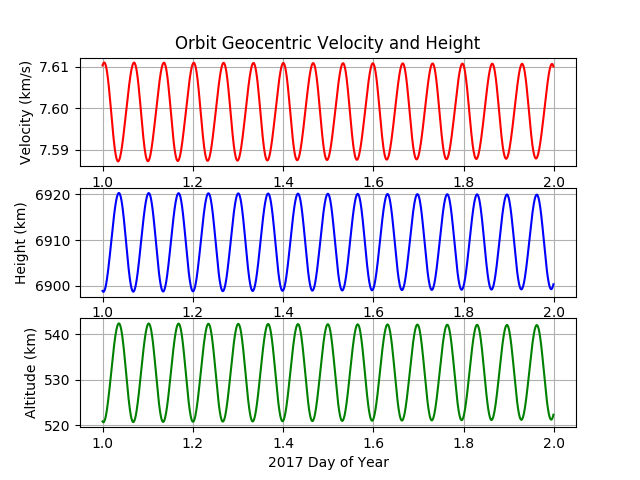

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(3)

ax1.grid('on')
ax2.grid('on')
ax3.grid('on')
ax1.plot(fdoypl, vpl, label = 'Velocity', color = 'r')
ax2.plot(fdoypl, rpl, label = 'Height', color = 'b')
ax3.plot(fdoypl, apl, label = 'Altitude', color = 'g')
ax3.set_xlabel(str(y0)+' Day of Year')
ax1.set_ylabel('Velocity (km/s)')
ax2.set_ylabel('Height (km)')
ax3.set_ylabel('Altitude (km)')
ax1.set_title('Orbit Geocentric Velocity, Height and Altitude')

mpld3.enable_notebook()

In [15]:
plt.savefig(outdir+'TLE_'+today+'.png')